In [10]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
X, y = load_wine(return_X_y=True)

In [5]:
# Train/Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 28)

In [24]:
#Base Model rf
rf_base_model = RandomForestClassifier()
rf_base_model.fit(X_train,y_train)
y_pred  = rf_base_model.predict(X_test)
base_accuracy = accuracy_score(y_test,y_pred)
print('rf base model accuracy score = {}'.format(base_accuracy))

rf base model accuracy score = 0.9629629629629629


[0.9444444444444444, 0.9629629629629629, 0.9629629629629629, 0.9814814814814815, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9444444444444444, 0.9629629629629629, 0.9629629629629629]


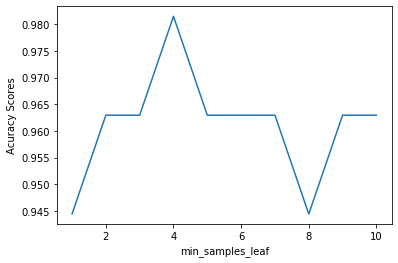

In [8]:
# Manual Tuning RF
acc_scores = []
for n in range(1,11):
    rf = RandomForestClassifier(min_samples_leaf=n).fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    acc_scores.append(accuracy_score(y_test,y_pred))

print(acc_scores)
import matplotlib.pyplot as plt
plt.plot(range(1,11), acc_scores)
plt.xlabel('min_samples_leaf')
plt.ylabel('Acuracy Scores')
plt.show()

In [251]:
# GridSearchCV
rf_params = {'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': range(1,11),
    'min_samples_split': range(1,15,5),
    'n_estimators': [100, 200, 300,500,1000]}
rf = RandomForestClassifier()
rf_gridcv_model = GridSearchCV(estimator=rf, param_grid=rf_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
rf_gridcv_model.best_params_
print('rf gridcv model accuracy score = {}'.format(rf_gridcv_model.best_score_))

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 31.5min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 39.0min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 47.0min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 55.8min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed: 57.6min finished


rf gridcv model accuracy score = 0.992


In [15]:
# RandomizeSearchCV
# from sklearn.model_selection import RandomizedSearchCV
rf_params = {'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': range(1,11),
    'min_samples_split': range(1,15,5),
    'n_estimators': [100, 200, 300,500,1000]}
rf = RandomForestClassifier()
rf_randomcv_model = RandomizedSearchCV(estimator=rf, param_distributions=rf_params, n_iter=200, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
rf_randomcv_model.best_params_
print('rf randomcv model accuracy score = {}'.format(rf_randomcv_model.best_score_))


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  6.5min finished


rf randomcv model accuracy score = 0.992


In [19]:
# RandomizeSearchCV
# from sklearn.model_selection import RandomizedSearchCV
rf_params = {'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': range(1,11),
    'min_samples_split': range(1,15,5),
    'n_estimators': [100, 200, 300,500,1000]}
rf = RandomForestClassifier()
rf_randomcv_model = RandomizedSearchCV(estimator=rf, param_distributions=rf_params, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
rf_randomcv_model.best_params_
print('rf randomcv model accuracy score = {}'.format(rf_randomcv_model.best_score_))


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   11.3s finished


rf randomcv model accuracy score = 0.992
